In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data = "data/mouse_drug_data.csv"
clinical_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data 

mousedata_df = pd.read_csv(mouse_data)
mousedata_df.head()
#mousedata_df


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [2]:
# Read the Clinical Trial Data

cd_df = pd.read_csv(clinical_data)
cd_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
merged_df = cd_df.merge(mousedata_df, on="Mouse ID", how = 'inner')

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = merged_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
mean_tumor_volume

# Convert to DataFrame
mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume) 

# Preview DataFrame
mean_tumor_volume_df

Tumor Volume (mm3) 
 
 
 Drug 
 Timepoint 
 
 
 
 
 
 Capomulin 
 0 
 45.000000 
 
 
 5 
 44.266086 
 
 
 10 
 43.084291 
 
 
 15 
 42.064317 
 
 
 20 
 40.716325 
 
 
 25 
 39.939528 
 
 
 30 
 38.769339 
 
 
 35 
 37.816839 
 
 
 40 
 36.958001 
 
 
 45 
 36.236114 
 
 
 Ceftamin 
 0 
 45.000000 
 
 
 5 
 46.503051 
 
 
 10 
 48.285125 
 
 
 15 
 50.094055 
 
 
 20 
 52.157049 
 
 
 25 
 54.287674 
 
 
 30 
 56.769517 
 
 
 35 
 58.827548 
 
 
 40 
 61.467895 
 
 
 45 
 64.132421 
 
 
 Infubinol 
 0 
 45.000000 
 
 
 5 
 47.062001 
 
 
 10 
 49.403909 
 
 
 15 
 51.296397 
 
 
 20 
 53.197691 
 
 
 25 
 55.715252 
 
 
 30 
 58.299397 
 
 
 35 
 60.742461 
 
 
 40 
 63.162824 
 
 
 45 
 65.755562 
 
 
 ... 
 ... 
 ... 
 
 
 Ramicane 
 0 
 45.000000 
 
 
 5 
 43.944859 
 
 
 10 
 42.531957 
 
 
 15 
 41.495061 
 
 
 20 
 40.238325 
 
 
 25 
 38.974300 
 
 
 30 
 38.703137 
 
 
 35 
 37.451996 
 
 
 40 
 36.574081 
 
 
 45 
 34.955595 
 
 
 Stelasyn 
 0 
 45.000000 
 
 
 5 
 47.527452 
 
 
 10 
 49.463844 
 
 
 15 
 51.529409 
 
 
 20 
 54.067395 
 
 
 25 
 56.166123 
 
 
 30 
 59.826738 
 
 
 35 
 62.440699 
 
 
 40 
 65.356386 
 
 
 45 
 68.438310 
 
 
 Zoniferol 
 0 
 45.000000 
 
 
 5 
 46.851818 
 
 
 10 
 48.689881 
 
 
 15 
 50.779059 
 
 
 20 
 53.170334 
 
 
 25 
 55.432935 
 
 
 30 
 57.713531 
 
 
 35 
 60.089372 
 
 
 40 
 62.916692 
 
 
 45 
 65.960888 
 
 
 
 100 rows × 1 columns

In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_error_tumor_volume = merged_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()
std_error_tumor_volume

# Convert to DataFrame
std_error_tumor_volume_df = pd.DataFrame(std_error_tumor_volume) 

# # Preview DataFrame
std_error_tumor_volume_df

Tumor Volume (mm3) 
 
 
 Drug 
 Timepoint 
 
 
 
 
 
 Capomulin 
 0 
 0.000000 
 
 
 5 
 0.448593 
 
 
 10 
 0.702684 
 
 
 15 
 0.838617 
 
 
 20 
 0.909731 
 
 
 25 
 0.881642 
 
 
 30 
 0.934460 
 
 
 35 
 1.052241 
 
 
 40 
 1.223608 
 
 
 45 
 1.223977 
 
 
 Ceftamin 
 0 
 0.000000 
 
 
 5 
 0.164505 
 
 
 10 
 0.236144 
 
 
 15 
 0.332053 
 
 
 20 
 0.359482 
 
 
 25 
 0.439356 
 
 
 30 
 0.490620 
 
 
 35 
 0.692248 
 
 
 40 
 0.708505 
 
 
 45 
 0.902358 
 
 
 Infubinol 
 0 
 0.000000 
 
 
 5 
 0.235102 
 
 
 10 
 0.282346 
 
 
 15 
 0.357705 
 
 
 20 
 0.476210 
 
 
 25 
 0.550315 
 
 
 30 
 0.631061 
 
 
 35 
 0.984155 
 
 
 40 
 1.055220 
 
 
 45 
 1.144427 
 
 
 ... 
 ... 
 ... 
 
 
 Ramicane 
 0 
 0.000000 
 
 
 5 
 0.482955 
 
 
 10 
 0.720225 
 
 
 15 
 0.770432 
 
 
 20 
 0.786199 
 
 
 25 
 0.746991 
 
 
 30 
 0.864906 
 
 
 35 
 0.967433 
 
 
 40 
 1.128445 
 
 
 45 
 1.226805 
 
 
 Stelasyn 
 0 
 0.000000 
 
 
 5 
 0.239862 
 
 
 10 
 0.433678 
 
 
 15 
 0.493261 
 
 
 20 
 0.621889 
 
 
 25 
 0.741922 
 
 
 30 
 0.899548 
 
 
 35 
 1.003186 
 
 
 40 
 1.410435 
 
 
 45 
 1.576556 
 
 
 Zoniferol 
 0 
 0.000000 
 
 
 5 
 0.188950 
 
 
 10 
 0.263949 
 
 
 15 
 0.370544 
 
 
 20 
 0.533182 
 
 
 25 
 0.602513 
 
 
 30 
 0.800043 
 
 
 35 
 0.881426 
 
 
 40 
 0.998515 
 
 
 45 
 1.003576 
 
 
 
 100 rows × 1 columns

In [6]:
# Minor Data Munging to Re-Format the Data Frames
merged_df_mung = pd.pivot_table(merged_df, index=['Timepoint'], columns=['Drug']) 

# Preview that Reformatting worked
merged_df_mung = merged_df_mung.loc[ : , 'Tumor Volume (mm3)']
merged_df_mung

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [7]:
# Extract means for the drugs - Capomulin, Infubinol, Ketapril and Placebo
capomulin = merged_df_mung[["Capomulin"]]
capomulin_list = capomulin['Capomulin'].tolist()

infubinol = merged_df_mung[["Infubinol"]]
infubinol_list = infubinol['Infubinol'].tolist()

ketapril = merged_df_mung[["Ketapril"]]
ketapril_list = ketapril['Ketapril'].tolist()

placebo = merged_df_mung[["Placebo"]]
placebo_list = placebo['Placebo'].tolist()

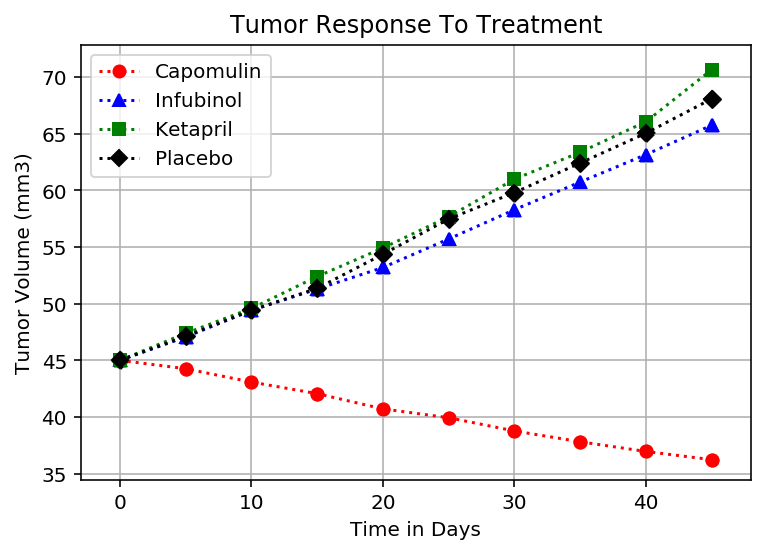

In [8]:
# Generate the Plot (with Error Bars)

x_limit = 50
x_axis = np.arange(0, x_limit, 5)

# Create a random array of data that we will use for our y values
# grades_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.scatter(x_axis, capomulin_list, marker='o', color='red')
plt.plot(x_axis, capomulin_list, 'r:o', label='Capomulin')
plt.scatter(x_axis, infubinol_list, marker='^', color='blue')
plt.plot(x_axis, infubinol_list, 'b:^', label='Infubinol')
plt.scatter(x_axis, ketapril_list, marker='s', color='green')
plt.plot(x_axis,ketapril_list, 'g:s', label='Ketapril')
plt.scatter(x_axis, placebo_list, marker='D', color='black')
plt.plot(x_axis, placebo_list, 'k:D', label='Placebo')

plt.title("Tumor Response To Treatment")
plt.xlabel('Time in Days')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.grid()

# Save the Figure
plt.savefig('Images/Tumor Response to Treatment.jpg')

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatic_sites = merged_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()

# Convert to DataFrame
mean_metastatic_sites_df = pd.DataFrame(mean_metastatic_sites) 

# Preview DataFrame
mean_metastatic_sites_df

Metastatic Sites 
 
 
 Drug 
 Timepoint 
 
 
 
 
 
 Capomulin 
 0 
 0.000000 
 
 
 5 
 0.160000 
 
 
 10 
 0.320000 
 
 
 15 
 0.375000 
 
 
 20 
 0.652174 
 
 
 25 
 0.818182 
 
 
 30 
 1.090909 
 
 
 35 
 1.181818 
 
 
 40 
 1.380952 
 
 
 45 
 1.476190 
 
 
 Ceftamin 
 0 
 0.000000 
 
 
 5 
 0.380952 
 
 
 10 
 0.600000 
 
 
 15 
 0.789474 
 
 
 20 
 1.111111 
 
 
 25 
 1.500000 
 
 
 30 
 1.937500 
 
 
 35 
 2.071429 
 
 
 40 
 2.357143 
 
 
 45 
 2.692308 
 
 
 Infubinol 
 0 
 0.000000 
 
 
 5 
 0.280000 
 
 
 10 
 0.666667 
 
 
 15 
 0.904762 
 
 
 20 
 1.050000 
 
 
 25 
 1.277778 
 
 
 30 
 1.588235 
 
 
 35 
 1.666667 
 
 
 40 
 2.100000 
 
 
 45 
 2.111111 
 
 
 ... 
 ... 
 ... 
 
 
 Ramicane 
 0 
 0.000000 
 
 
 5 
 0.120000 
 
 
 10 
 0.250000 
 
 
 15 
 0.333333 
 
 
 20 
 0.347826 
 
 
 25 
 0.652174 
 
 
 30 
 0.782609 
 
 
 35 
 0.952381 
 
 
 40 
 1.100000 
 
 
 45 
 1.250000 
 
 
 Stelasyn 
 0 
 0.000000 
 
 
 5 
 0.240000 
 
 
 10 
 0.478261 
 
 
 15 
 0.782609 
 
 
 20 
 0.952381 
 
 
 25 
 1.157895 
 
 
 30 
 1.388889 
 
 
 35 
 1.562500 
 
 
 40 
 1.583333 
 
 
 45 
 1.727273 
 
 
 Zoniferol 
 0 
 0.000000 
 
 
 5 
 0.166667 
 
 
 10 
 0.500000 
 
 
 15 
 0.809524 
 
 
 20 
 1.294118 
 
 
 25 
 1.687500 
 
 
 30 
 1.933333 
 
 
 35 
 2.285714 
 
 
 40 
 2.785714 
 
 
 45 
 3.071429 
 
 
 
 100 rows × 1 columns

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_std_error = merged_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()

# Convert to DataFrame
metastatic_std_error_df = pd.DataFrame(metastatic_std_error) 

# Preview DataFrame
metastatic_std_error_df

Metastatic Sites 
 
 
 Drug 
 Timepoint 
 
 
 
 
 
 Capomulin 
 0 
 0.000000 
 
 
 5 
 0.074833 
 
 
 10 
 0.125433 
 
 
 15 
 0.132048 
 
 
 20 
 0.161621 
 
 
 25 
 0.181818 
 
 
 30 
 0.172944 
 
 
 35 
 0.169496 
 
 
 40 
 0.175610 
 
 
 45 
 0.202591 
 
 
 Ceftamin 
 0 
 0.000000 
 
 
 5 
 0.108588 
 
 
 10 
 0.152177 
 
 
 15 
 0.180625 
 
 
 20 
 0.241034 
 
 
 25 
 0.258831 
 
 
 30 
 0.249479 
 
 
 35 
 0.266526 
 
 
 40 
 0.289128 
 
 
 45 
 0.286101 
 
 
 Infubinol 
 0 
 0.000000 
 
 
 5 
 0.091652 
 
 
 10 
 0.159364 
 
 
 15 
 0.194015 
 
 
 20 
 0.234801 
 
 
 25 
 0.265753 
 
 
 30 
 0.227823 
 
 
 35 
 0.224733 
 
 
 40 
 0.314466 
 
 
 45 
 0.309320 
 
 
 ... 
 ... 
 ... 
 
 
 Ramicane 
 0 
 0.000000 
 
 
 5 
 0.066332 
 
 
 10 
 0.090289 
 
 
 15 
 0.115261 
 
 
 20 
 0.119430 
 
 
 25 
 0.119430 
 
 
 30 
 0.139968 
 
 
 35 
 0.145997 
 
 
 40 
 0.160591 
 
 
 45 
 0.190221 
 
 
 Stelasyn 
 0 
 0.000000 
 
 
 5 
 0.087178 
 
 
 10 
 0.123672 
 
 
 15 
 0.153439 
 
 
 20 
 0.200905 
 
 
 25 
 0.219824 
 
 
 30 
 0.230641 
 
 
 35 
 0.240983 
 
 
 40 
 0.312815 
 
 
 45 
 0.359062 
 
 
 Zoniferol 
 0 
 0.000000 
 
 
 5 
 0.077709 
 
 
 10 
 0.109109 
 
 
 15 
 0.111677 
 
 
 20 
 0.166378 
 
 
 25 
 0.236621 
 
 
 30 
 0.248168 
 
 
 35 
 0.285714 
 
 
 40 
 0.299791 
 
 
 45 
 0.286400 
 
 
 
 100 rows × 1 columns

In [11]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_mung = pd.pivot_table(merged_df, index=['Timepoint'], columns=['Drug']) 

# Preview that Reformatting worked
metastatic_mung = metastatic_mung.loc[ : , 'Metastatic Sites']
metastatic_mung

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [12]:
# Extract means for the drugs - Capomulin, Infubinol, Ketapril and Placebo
capomulin_metastatic_mung = metastatic_mung[["Capomulin"]]
capomulin_metastatic_mung_list = capomulin_metastatic_mung['Capomulin'].tolist()

infubinol_metastatic_mung = metastatic_mung[["Infubinol"]]
infubinol_metastatic_mung_list = infubinol_metastatic_mung['Infubinol'].tolist()

ketapril_metastatic_mung = metastatic_mung[["Ketapril"]]
ketapril_metastatic_mung_list = ketapril_metastatic_mung['Ketapril'].tolist()

placebo_metastatic_mung = metastatic_mung[["Placebo"]]
placebo_metastatic_mung_list = placebo_metastatic_mung['Placebo'].tolist()


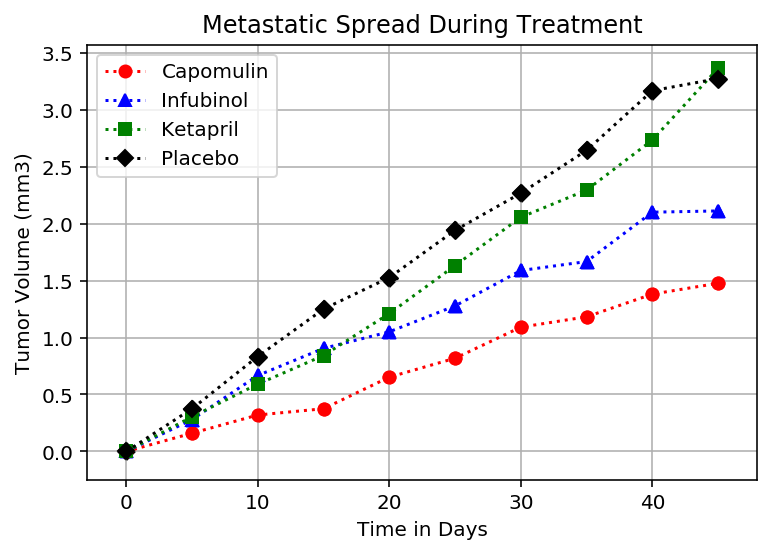

In [13]:
# Generate the Plot (with Error Bars)

x_limit = 50
x_axis = np.arange(0, x_limit, 5)

plt.scatter(x_axis, capomulin_metastatic_mung_list, marker='o', color='red')
plt.plot(x_axis, capomulin_metastatic_mung_list, 'r:o', label='Capomulin')
plt.scatter(x_axis, infubinol_metastatic_mung_list, marker='^', color='blue')
plt.plot(x_axis, infubinol_metastatic_mung_list, 'b:^', label='Infubinol')
plt.scatter(x_axis, ketapril_metastatic_mung_list, marker='s', color='green')
plt.plot(x_axis, ketapril_metastatic_mung_list, 'g:s', label='Ketapril')
plt.scatter(x_axis, placebo_metastatic_mung_list, marker='D', color='black')
plt.plot(x_axis, placebo_metastatic_mung_list, 'k:D', label='Placebo')

plt.title("Metastatic Spread During Treatment")
plt.xlabel('Time in Days')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.legend()

# Save the Figure
plt.savefig('Images/Metastatic Spread During Treatment.jpg')

# Show the Figure
plt.show()

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = merged_df.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()
# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count)

# Preview DataFrame
mice_count_df

Mouse ID 
 
 
 Drug 
 Timepoint 
 
 
 
 
 
 Capomulin 
 0 
 25 
 
 
 5 
 25 
 
 
 10 
 25 
 
 
 15 
 24 
 
 
 20 
 23 
 
 
 25 
 22 
 
 
 30 
 22 
 
 
 35 
 22 
 
 
 40 
 21 
 
 
 45 
 21 
 
 
 Ceftamin 
 0 
 25 
 
 
 5 
 21 
 
 
 10 
 20 
 
 
 15 
 19 
 
 
 20 
 18 
 
 
 25 
 18 
 
 
 30 
 16 
 
 
 35 
 14 
 
 
 40 
 14 
 
 
 45 
 13 
 
 
 Infubinol 
 0 
 25 
 
 
 5 
 25 
 
 
 10 
 21 
 
 
 15 
 21 
 
 
 20 
 20 
 
 
 25 
 18 
 
 
 30 
 17 
 
 
 35 
 12 
 
 
 40 
 10 
 
 
 45 
 9 
 
 
 ... 
 ... 
 ... 
 
 
 Ramicane 
 0 
 25 
 
 
 5 
 25 
 
 
 10 
 24 
 
 
 15 
 24 
 
 
 20 
 23 
 
 
 25 
 23 
 
 
 30 
 23 
 
 
 35 
 21 
 
 
 40 
 20 
 
 
 45 
 20 
 
 
 Stelasyn 
 0 
 26 
 
 
 5 
 25 
 
 
 10 
 23 
 
 
 15 
 23 
 
 
 20 
 21 
 
 
 25 
 19 
 
 
 30 
 18 
 
 
 35 
 16 
 
 
 40 
 12 
 
 
 45 
 11 
 
 
 Zoniferol 
 0 
 25 
 
 
 5 
 24 
 
 
 10 
 22 
 
 
 15 
 21 
 
 
 20 
 17 
 
 
 25 
 16 
 
 
 30 
 15 
 
 
 35 
 14 
 
 
 40 
 14 
 
 
 45 
 14 
 
 
 
 100 rows × 1 columns

In [15]:
# Minor Data Munging to Re-Format the Data Frames
micecountmung = pd.pivot_table(mice_count_df, index=['Timepoint'], columns=['Drug']) 

# Preview that DataFrame
mice_count_mung = micecountmung.loc[:, 'Mouse ID']
mice_count_mung

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [16]:
# Extract means for the drugs - Capomulin, Infubinol, Ketapril and Placebo
capomulin_micecount_mung = mice_count_mung[["Capomulin"]]
capomulin_micecount_mung_list = capomulin_micecount_mung['Capomulin'].tolist()

infubinol_micecount_mung = mice_count_mung[["Infubinol"]]
infubinol_micecount_mung_list = infubinol_micecount_mung['Infubinol'].tolist()

ketapril_micecount_mung = mice_count_mung[["Ketapril"]]
ketapril_micecount_mung_list = ketapril_micecount_mung['Ketapril'].tolist()

placebo_micecount_mung = mice_count_mung[["Placebo"]]
placebo_micecount_mung_list = placebo_micecount_mung['Placebo'].tolist()

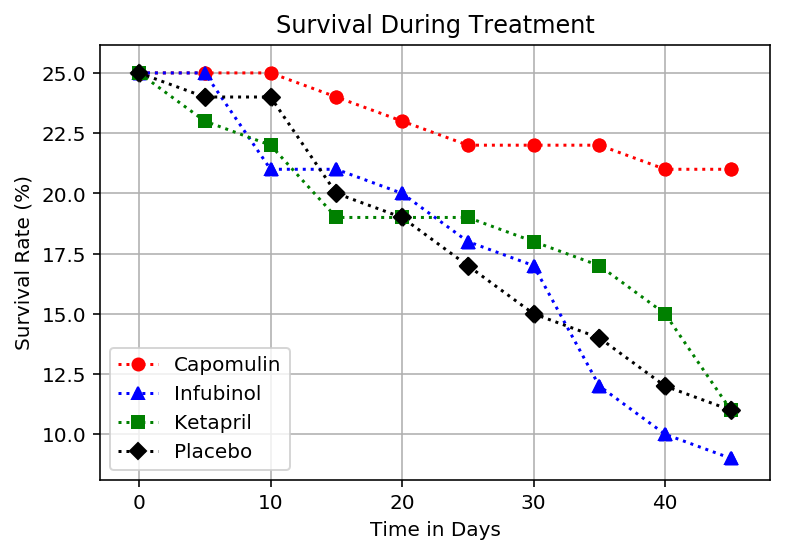

In [17]:
# Generate the Plot (Accounting for percentages)

x_limit = 50
x_axis = np.arange(0, x_limit, 5)

plt.scatter(x_axis, capomulin_micecount_mung_list, marker='o', color='red')
plt.plot(x_axis, capomulin_micecount_mung_list, 'r:o', label='Capomulin')
plt.scatter(x_axis, infubinol_micecount_mung_list, marker='^', color='blue')
plt.plot(x_axis, infubinol_micecount_mung_list, 'b:^', label='Infubinol')
plt.scatter(x_axis, ketapril_micecount_mung_list, marker='s', color='green')
plt.plot(x_axis, ketapril_micecount_mung_list, 'g:s', label='Ketapril')
plt.scatter(x_axis, placebo_micecount_mung_list, marker='D', color='black')
plt.plot(x_axis, placebo_micecount_mung_list, 'k:D', label='Placebo')

plt.title("Survival During Treatment")
plt.xlabel('Time in Days')
plt.ylabel('Survival Rate (%)')
plt.grid()
plt.legend()

# Save the Figure
plt.savefig('Images/Survival During Treatment.jpg')

# Show the Figure
plt.show()

## Summary Bar Graph

In [20]:
# Calculate the percent changes for each drug
mean_tumor_vol_df = mean_tumor_volume_df.loc[:, 'Tumor Volume (mm3)']

capomulin_perc_change = ((mean_tumor_vol_df.loc['Capomulin'][45] - mean_tumor_vol_df.loc['Capomulin'][0]) / mean_tumor_vol_df.loc['Capomulin'][0]) * 100
capomulin_perc_change = round(capomulin_perc_change, 2)

ceftamin_perc_change = ((mean_tumor_vol_df.loc['Ceftamin'][45] - mean_tumor_vol_df.loc['Ceftamin'][0]) / mean_tumor_vol_df.loc['Ceftamin'][0]) * 100
ceftamin_perc_change = round(ceftamin_perc_change, 2)

infubinol_perc_change = ((mean_tumor_vol_df.loc['Infubinol'][45] - mean_tumor_vol_df.loc['Infubinol'][0]) / mean_tumor_vol_df.loc['Infubinol'][0]) * 100
infubinol_perc_change = round(infubinol_perc_change, 2)

ketapril_perc_change = ((mean_tumor_vol_df.loc['Ketapril'][45] - mean_tumor_vol_df.loc['Ketapril'][0]) / mean_tumor_vol_df.loc['Ketapril'][0]) * 100
ketapril_perc_change = round(ketapril_perc_change, 2)

naftisol_perc_change = ((mean_tumor_vol_df.loc['Naftisol'][45] - mean_tumor_vol_df.loc['Naftisol'][0]) / mean_tumor_vol_df.loc['Naftisol'][0]) * 100
naftisol_perc_change = round(naftisol_perc_change, 2)

placebo_perc_change = ((mean_tumor_vol_df.loc['Placebo'][45] - mean_tumor_vol_df.loc['Placebo'][0]) / mean_tumor_vol_df.loc['Placebo'][0]) * 100
placebo_perc_change = round(placebo_perc_change, 2)

propriva_perc_change = ((mean_tumor_vol_df.loc['Propriva'][45] - mean_tumor_vol_df.loc['Propriva'][0]) / mean_tumor_vol_df.loc['Propriva'][0]) * 100
propriva_perc_change = round(propriva_perc_change, 2)

ramicane_perc_change = ((mean_tumor_vol_df.loc['Ramicane'][45] - mean_tumor_vol_df.loc['Ramicane'][0]) / mean_tumor_vol_df.loc['Ramicane'][0]) * 100
ramicane_perc_change = round(ramicane_perc_change, 2)

stelasyn_perc_change = ((mean_tumor_vol_df.loc['Stelasyn'][45] - mean_tumor_vol_df.loc['Stelasyn'][0]) / mean_tumor_vol_df.loc['Stelasyn'][0]) * 100
stelasyn_perc_change = round(stelasyn_perc_change, 2)

zoniferol_perc_change = ((mean_tumor_vol_df.loc['Zoniferol'][45] - mean_tumor_vol_df.loc['Zoniferol'][0]) / mean_tumor_vol_df.loc['Zoniferol'][0]) * 100
zoniferol_perc_change = round(zoniferol_perc_change, 2)


# Display the data to confirm
perc_change_list = [capomulin_perc_change, ceftamin_perc_change, 
                    infubinol_perc_change, ketapril_perc_change, 
                    naftisol_perc_change, placebo_perc_change,
                    propriva_perc_change, ramicane_perc_change, 
                    stelasyn_perc_change, zoniferol_perc_change]

drugs = ['Capomulin', 'Ceftamin', 'Infubinol',
         'Ketapril', 'Naftisol', 'Placebo', 
         'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

perc_change_df = pd.DataFrame(perc_change_list, columns = ['Percent Change',], index=drugs)
perc_change_df

,Percent Change
Capomulin,-19.48
Ceftamin,42.52
Infubinol,46.12
Ketapril,57.03
Naftisol,53.92
Placebo,51.30
Propriva,47.24
Ramicane,-22.32
Stelasyn,52.09
Zoniferol,46.58


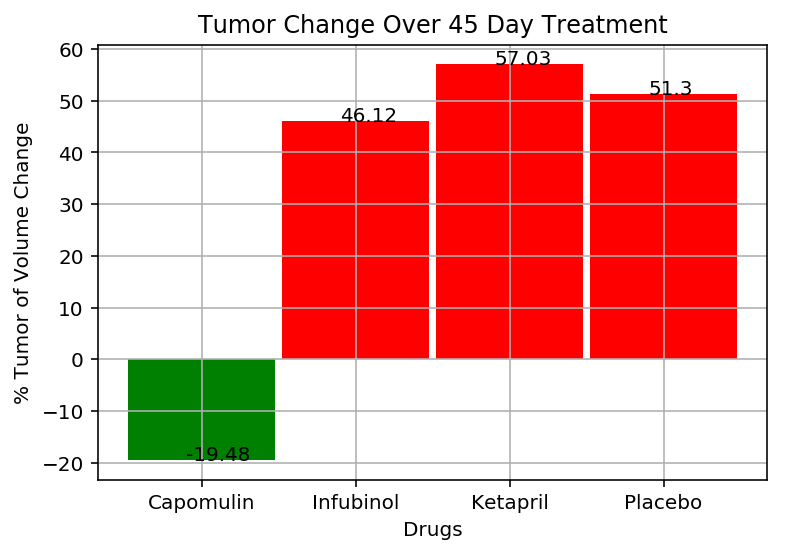

In [27]:
# Store all Relevant Percent Changes into a Tuple
perc_change_tuple = (capomulin_perc_change, infubinol_perc_change, ketapril_perc_change, placebo_perc_change)
perc_change_tuple

bars = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
height = perc_change_tuple
y = np.arange(len(bars))
width = 1/1.05
plt.bar(y, height, width, color=['green', 'red', 'red', 'red'])
plt.grid()
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel('Drugs')
plt.xticks(y, bars)
plt.ylabel('% Tumor of Volume Change')

for a,b in zip(y, height):
    plt.text(a - 0.10, b, str(b))

# Save the Figure
plt.savefig("Images/Tumor Change Over 45 Day Treatment.jpg")

# Show the Figure
plt.show()